# **Tarea 1: Clasificación lineal con *Scikit-Learn***
---

En esta tarea deberá entrenar modelos de clasificación con regresión logística para el [conjunto de datos de flores Iris](https://archive.ics.uci.edu/ml/datasets/iris) del repositorio de la *UCI* usando *Scikit-learn*.

El conjunto de datos cuenta con información de medidas en flores *Iris* de tres especies distintas:

| Variable | Definición	| Valores | 
| --- | --- | --- |
| sepal_length | 	Longitud del sépalo en centímetros. | 	numérico |
| sepal_width 	|  Ancho del sépalo en centímetros. | 	numérico
| petal_length 	| Longitud del pétalo en centímetros. 	| numérico|
| petal_width |	Ancho del pétalo en centímetros. 	| numérico|
| label |	Etiqueta con la especie de la flor medida.	| 'setosa', 'virginica' y 'versicolor' |


> **Nota:** Esta tarea va a ser calificada en la plataforma **[UNCode](https://juezun.github.io/)**. Para esto, en cada ejercicio se indicará si es calificable o no, también los lugares donde debe escribir su código sin modificar lo demás con un aproximado de cantidad de líneas a escribir. No se preocupe si su código toma más líneas, esto es simplemente un aproximado destinado a que pueda replantear su estrategia si el código está tomando más de las esperadas. No es un requisito estricto y soluciones más largas también son válidas. Al finalizar, para realizar el envío (*submission*), descargue el notebook como un archivo **`.ipynb`** y haga su entrega a través de **Moodle**.
>
> **La tarea es incremental, es recomendable resolver los puntos en orden.**


Ejecute la siguiente celda para importar y configurar las librerías usadas:

In [1]:
# Needed libraries for the exercise
from numbers import Number
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn

# Useful library to ignore warning 
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Versions
!python --version
print('NumPy', np.__version__)
print('Matplotlib', mpl.__version__)
print('Seaborn', sns.__version__)
print('Scikit-learn', sklearn.__version__)

Python 3.11.5
NumPy 1.26.0
Matplotlib 3.8.0
Seaborn 0.13.0
Scikit-learn 1.3.1


Esta actividad se realizó con las siguientes versiones:
*  *Python*: 3.11.5
*  *NumPy*:  1.26.0
*  *Matplotlib*:  3.8.2
*  *Seaborn*:  0.13.10
*  *Scikit-learn*: 1.3.1

## **1. Cargar Iris en formato `X, y`**
---
Una tarea esencial al emprender un proceso de modelado de aprendizaje computacional es la obtención y disposición en el formato adecuado de los datos de interés, y la distinción de sus variables de entrada y de predicción.

Complete la función **`load_X_y`** de tal manera que cargue el conjunto de datos *Iris* en el formato **`X, y`**. Utilice las librerías de utilidad para la carga de conjuntos de datos de *Scikit-learn*.

**`X`** debe corresponder a las características del conjunto de datos *Iris* y **`y`** a las etiquetas.

**Salida**:
* **`X`**: arreglo de *NumPy* de $2$ dimensiones con las variables de entrada del conjunto de datos *Iris* (longitud y ancho de los pétalos y sépalos de la flor).
* **`y`**: arreglo de *NumPy* de $1$ dimensión con la variable de salida del conjunto de datos *Iris* (etiqueta de la especie de la flor).

In [3]:
# FUNCIÓN CALIFICADA load_X_y:

# Import dataset module to load iris database
from sklearn import datasets

def load_X_y():
  """
  Returns:
    X: numpy array (150, 4) => input variables of the dataset iris (data)
    y: numpy array (150,) => output variable of the dataset iris (target) 
  """
  X, y = datasets.load_iris(return_X_y=True)
  
  return X, y

Use la siguiente celda para probar su función:

In [4]:
#TEST_CELL
X, y = load_X_y()

if isinstance(X, np.ndarray) and isinstance(y, np.ndarray):
  print("El shape de X es:", X.shape)
  print("El shape de y es:", y.shape)
else: 
  print("El tipo de los objetos es incorrecto.")

El shape de X es: (150, 4)
El shape de y es: (150,)


**Salida esperada:**
 
 ```
El shape de X es: (150, 4)
El shape de y es: (150,)
```

Ejecute la siguiente celda (después de completar el punto anterior) para visualizar la distribución de etiquetas del conjunto de datos Iris.

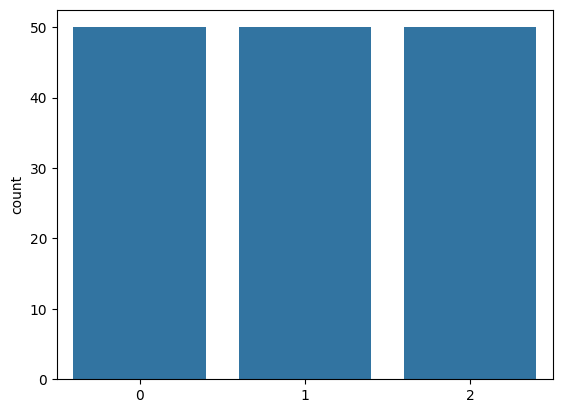

In [5]:
#TEST_CELL
X, y = load_X_y()

plt.figure(dpi=100)
sns.countplot(x=y);

Debería ver un conjunto de datos **equilibrado** con $50$ etiquetas de cada clase ($3$ clases).

**Salida esperada:**

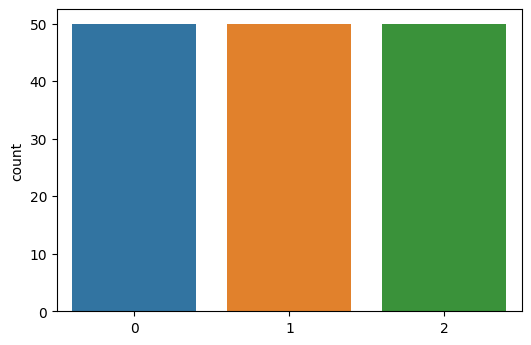

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Pista 1</b></font>
</summary>

* Consulte la [lista de conjuntos de datos](https://scikit-learn.org/stable/datasets/toy_dataset.html) disponibles como *loaders* en el módulo **`sklearn.datasets`**.



## **2. Seleccionar columnas del arreglo `X`**
---
En el momento de la preparación del conjunto de datos se suele necesitar de la selección de un subconjunto de las características más pertinentes para el modelo del conjunto de datos original.

Complete la función **`select_columns`** de tal manera que dado un arreglo (matriz) de *NumPy* **`X`** retorne las columnas incluidas en **`features`**. La variable **`features`** contendrá exclusivamente números entre $0$ y $3$ (inclusivo) sin repeticiones, representando el índice o posición de las columnas deseadas.


**Entrada**: 
* **`X`**: arreglo de *NumPy* de tamaño $(n, 4)$.
* **`features`**: lista de números enteros entre $0$ y $3$ de tamaño $m$.

**Salida**:
* **`X_selected`** arreglo de *Numpy* de tamaño $(n, m)$ con únicamente las columnas **`features`** del arreglo **`X`** en el mismo orden de entrada.

In [7]:
# FUNCIÓN CALIFICADA select_columns:

def select_columns(X, features):
  """
    X: numpy data matrix (n, 4).
    features: list o f number between 0 and 3 and size m.
    Returns:
    X_selected: matrix (n, m) where 'n' equal to numbers of examples
    and 'm' is the numbers of features.
  """
  # Select the columns present in features 
  X_selected = X[:,features]
  
  return X_selected

In [8]:
#TEST_CELL
X_total = np.empty(shape = (300, 6))

X_selected = select_columns(X_total, [0, 4])
if isinstance(X_selected, np.ndarray):
  print('El shape de "X_selected" es:', X_selected.shape)
else: 
  print("El tipo del objeto es incorrecto.")

El shape de "X_selected" es: (300, 2)


**Salida esperada:**
```
El shape de "X_selected" es: (300, 2)
```

En el conjunto *Iris* las características de entrada corresponden a diferentes medidas de las partes de una flor de esta especie. 
Considere la siguiente correspondencia entre los índices de las columnas y sus nombres:

| # de columna 	| Nombre de la variable 	|
|--------	|-----------------------	|
| 0      	| 'sepal length (cm)'   	|
| 1      	| 'sepal width (cm)'    	|
| 2      	| 'petal length (cm)'   	|
| 3      	| 'petal width (cm)'    	|



Por ejemplo, para seleccionar las columnas correspondientes a **`sepal width (cm)`** y **`petal width (cm)`** debemos usar los índices $1$ y $3$ del arreglo de la siguiente forma:

In [9]:
#TEST_CELL

# La variable X fue cargada en la celda 
# de pruebas del ejercicio 1.
X, y = load_X_y()   

# Índices 1 y 3 para las variables sepal width y petal width.
X_selected = select_columns(X, [1, 3]) 

if isinstance(X_selected, np.ndarray) and X_selected.shape == (150, 2):
  print(f'El shape de X_selected es {X_selected.shape}')
  print('Los dos primeros ejemplos:')
  print(X_selected[:2, :])
else:
  print('El resultado obtenido no es un arreglo de NumPy o no tiene el tamaño esperado')

El shape de X_selected es (150, 2)
Los dos primeros ejemplos:
[[3.5 0.2]
 [3.  0.2]]


**Salida esperada:**
```
El shape de X_selected es (150, 2)
Los dos primeros ejemplos:
[[3.5 0.2]
 [3.  0.2]]
```

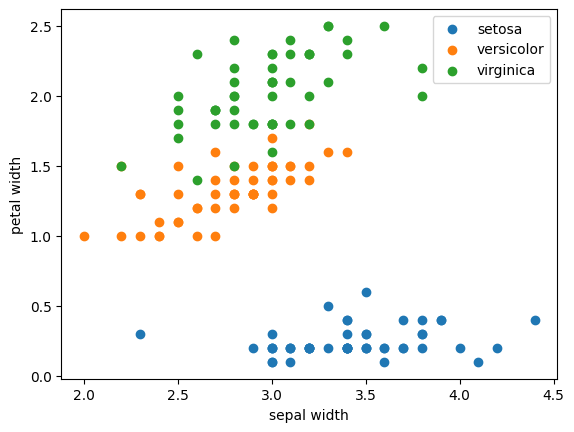

In [10]:
#TEST_CELL
#@markdown **Celda de pruebas** 
#@markdown ***
#@markdown Ejecute esta celda para graficar un diagrama de dispersión con las variables **`sepal width (cm)`** y **`petal width (cm)`**.
#@markdown > **Nota**: Esta celda contiene código para la generación de visualizaciones y está oculto por defecto (solo para *Google Colaboratory*). Si desea revisar su contenido haga clic secundario en la celda (costado izquierdo de color gris) y seleccione las opciones **`Formulario|Form`** y **`Mostrar código|Show code`**.

def scatter_plot(X_selected, y):
  if not isinstance(X_selected, np.ndarray) or not isinstance(y, np.ndarray):
    print('La función retorna el tipo de dato incorrecto.')
    return
    
  plt.figure(dpi=100)
  target_names = ['setosa', 'versicolor', 'virginica']
  for i, target_name in enumerate(target_names):
    ids = y == i
    plt.scatter(X_selected[ids,0], X_selected[ids,1], label=target_name)
  plt.ylabel('petal width')
  plt.xlabel('sepal width')
  plt.legend()
  
X, y = load_X_y()
X_selected = select_columns(X, [1, 3]) 

if X_selected is not None and y is not None:
  scatter_plot(X_selected, y)
else: print("Los objetos 'X_selected' y 'y' no han sido declarados correctamente." )

**Salida esperada:**

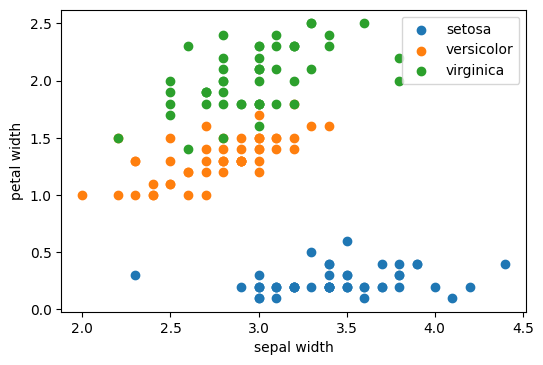

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Pista 1</b></font>
</summary>

Se puede acceder a el elemento de la fila **`i`** y en la columna **`j`** de un arreglo de *NumPy* con el siguiente sintaxis: **`X[i,j]`**.


<details>    
<summary>
    <font size="3" color="darkgreen"><b>Pista 2</b></font>
</summary>

Se puede acceder a la columna **`j`** de un arreglo de *NumPy* con la siguiente sintaxis: **`X[:,j]`**.


<details>    
<summary>
    <font size="3" color="darkgreen"><b>Pista 3</b></font>
</summary>

Se puede acceder a una lista de columnas **`cols`** de un arreglo de *NumPy* con el siguiente sintaxis: **`X[:,cols]`** donde **`cols`** es una lista con las características.


## **3. Convertir características al rango $[a,b]$**
---

Algunas técnicas de modelado tienen como requisito la ejecución de tareas de preprocesamiento, como el reescalado o normalización de los datos originales, para obtener los resultados esperados.

Complete la función **`minmax`** para convertir las columnas de **`X`** al rango **`[min_value, max_value]`** de manera independiente.

**Entrada**:
* **`X`**: arreglo de *NumPy* de tamaño $(n, m)$.
* **`min_value`**: número real con el valor mínimo requerido de la matriz de salida generada.
* **`max_value`**: número real con el valor máximo requerido de la matriz de salida generada.

**Salida**:
* **`X_scaled`**: arreglo de *NumPy* con shape $(n, m)$ correspondiente a **`X`** donde cada columna ha sido transformada al rango **`[min_value, max_value]`** de manera independiente.


In [13]:
# FUNCIÓN CALIFICADA minmax:

# Módulo necesario para realizar el ejercicio.
from sklearn import preprocessing

def minmax(X, min_value, max_value):
  """
    X: data matrix, numpy array of shape (n, m).
    min_value: real number, min value required.
    max_value: real number, max value required.
  Returns: 
    X_scaled: new numpy array of shape (n, m), every column has been 
    transformed independently to the specified range [min_value, max_value]
  """ 
  # Declares transformer MinMaxScaler
  scaler = preprocessing.MinMaxScaler(feature_range=(min_value, max_value))
  # Transforms the X matrix 
  X_scaled = scaler.fit_transform(X)
  
  return X_scaled

Use la siguiente celda para probar la transformación:

In [14]:
#TEST_CELL

# Arreglo de tamaño (50, 2) con valores
# enteros aleatorios entre -100 y 100.
X_example = np.random.randint(-100, 100, 
                               size = (50, 2))
# Realizamos el escalado
X_minmax = minmax(X_example, 0, 1)

if isinstance(X_minmax, np.ndarray):
  print(f"Valor mínimo columna 0: {np.min(X_minmax[:, 0])}")
  print(f"Valor máximo columna 0: {np.max(X_minmax[:, 0])}")
  print(f"Valor mínimo columna 1: {np.min(X_minmax[:, 1])}")
  print(f"Valor máximo columna 1: {np.max(X_minmax[:, 1])}")

else:
  print("La función no retorna un arreglo de NumPy válido.")

Valor mínimo columna 0: 0.0
Valor máximo columna 0: 1.0
Valor mínimo columna 1: 0.0
Valor máximo columna 1: 0.9999999999999999


**Salida esperada:**
```
Valor mínimo columna 0: 0.0
Valor máximo columna 0: 1.0
Valor mínimo columna 1: 0.0
Valor máximo columna 1: 1.0
```

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Pista</b></font>
</summary>


* No es necesario realizar el escalado con un proceso independiente para cada columna. Puede utilizar la función [**`MinMaxScaler`**](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) del módulo **`sklearn.preprocessing`** para realizar este proceso automáticamente sobre un arreglo de *NumPy*, tal como se vio en el taller guiado.


##  **4. Generar particiones de entrenamiento y prueba**
---
Al realizar algoritmos de aprendizaje supervisado es importante separar una parte de los datos, que no serán usados en el entrenamiento, para evaluar el desempeño del modelo.

Complete la función **`get_split`** de tal manera que haga una partición de los datos en los conjuntos de entrenamiento y prueba usando *Scikit-learn*. 

> **Nota:** La función creada deberá aceptar un argumento para definir el tamaño relativo de la partición de prueba (**`p`**) y otro para definir la semilla aleatoria (**`random_state`**) para garantizar la reproducibilidad.

**Entrada**:

* **`X`**: arreglo de *NumPy* de tamaño $(n, m)$.
* **`y`**: arreglo de *NumPy* de tamaño $(n, )$.
* **`p`**: número real entre $0$ y $1$ con la proporción correspondiente a la partición de prueba.
* **`random_state`**: número real con la semilla aleatoria para la generación de la partición.

**Salida**:
* **`X_train`**: arreglo de *NumPy* con *shape* aproximado $(n\cdot (1-p), m)$ para la partición de entrenamiento de **`X`**.
* **`X_test`**:  arreglo de *NumPy* con *shape* aproximado $(n\cdot p, m)$ para la partición de prueba de **`X`**.
* **`y_train`**: arreglo de *NumPy* con *shape* aproximado $(n \cdot (1-p),)$ para la partición de entrenamiento de **`y`**.
* **`y_test`**:  arreglo de *NumPy* con *shape* aproximado $(n\cdot p,)$ para la partición de prueba de **`y`**.



In [19]:
# FUNCIÓN CALIFICADA get_split:

from sklearn import model_selection

def get_split(X, y, p=0.3, random_state=100): # Do not change the value of p
  """
    X: data matrix, numpy array of shape (n, m).
    y: label vector, numpy array of shape (n,)
    p: specifies size for the test partition, real number between 0 and 1.
    random_state: random see, guarantees reproducibility 

  Retorna: 
    X_train: numpy array with aprox. shape (n(1 - p), m) => X training partition.
    X_test: numpy array with aprox. shape (n(p), m) => X test partition.
    y-train: numpy array with aprox. shape (n(1 - p),) => y training partition.
    y_test: numpy array with aprox. shape (n(p),) => y test partition.
  """
  # Test-train partition
  X_train, X_test, y_train, y_test = model_selection.train_test_split(X,
                                                                      y,
                                                                      test_size=p,
                                                                      random_state=random_state)

  return X_train, X_test, y_train, y_test

Use la siguiente celda para probar su partición:

In [20]:
#TEST_CELL
X = np.arange(500).reshape(100, 5)
y = np.arange(100)

X_train, X_test, y_train, y_test = get_split(X, y)

if np.all([isinstance(p, np.ndarray) for p in (X_train, X_test, y_train, y_test)]):
  print('I. Partición de entrenamiento:\n')

  print(f"Tamaño de X: {X_train.shape}")
  print(f"Primeros 5 valores de X:")
  print(X_train[:5, :])

  print(f"\nTamaño de y: {y_train.shape}")
  print(f"Primeros 5 valores de y: {y_train[:5]}")

  print('\nII. Partición de prueba:\n')
  print(f"Tamaño de X: {X_test.shape}")

  print(f"Primeros 5 valores de X:")
  print(X_test[:5, :])
  print(f"\nTamaño de y: {y_test.shape}")
  print(f"Primeros 5 valores de y: {y_test[:5]}")
else:
  print("Alguno de los objetos asignado no es un arreglo de NumPy válido.")

I. Partición de entrenamiento:

Tamaño de X: (70, 5)
Primeros 5 valores de X:
[[160 161 162 163 164]
 [ 30  31  32  33  34]
 [ 15  16  17  18  19]
 [ 60  61  62  63  64]
 [255 256 257 258 259]]

Tamaño de y: (70,)
Primeros 5 valores de y: [32  6  3 12 51]

II. Partición de prueba:

Tamaño de X: (30, 5)
Primeros 5 valores de X:
[[185 186 187 188 189]
 [310 311 312 313 314]
 [130 131 132 133 134]
 [205 206 207 208 209]
 [175 176 177 178 179]]

Tamaño de y: (30,)
Primeros 5 valores de y: [37 62 26 41 35]


**Salida esperada**:

```
I. Partición de entrenamiento:

Tamaño de X: (70, 5)
Primeros 5 valores de X:
[[160 161 162 163 164]
 [ 30  31  32  33  34]
 [ 15  16  17  18  19]
 [ 60  61  62  63  64]
 [255 256 257 258 259]]

Tamaño de y: (70,)
Primeros 5 valores de y: [32  6  3 12 51]

II. Partición de prueba:

Tamaño de X: (30, 5)
Primeros 5 valores de X:
[[185 186 187 188 189]
 [310 311 312 313 314]
 [130 131 132 133 134]
 [205 206 207 208 209]
 [175 176 177 178 179]]

Tamaño de y: (30,)
Primeros 5 valores de y: [37 62 26 41 35]
```

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Pista 1</b></font>
</summary>


* Utilice la función [**`train_test_split`**](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) del módulo **`sklearn.model_selection`** tal como se vio en el taller guiado.


<details>    
<summary>
    <font size="3" color="darkgreen"><b>Pista 2</b></font>
</summary>


* El argumento **`p`** permite definir la cantidad de datos usados para el subconjunto de pruebas. Si tiene problemas con el tamaño de la partición puede hacer falta usar este argumento en el llamado de la función de generación de particiones.


<details>    
<summary>
    <font size="3" color="darkgreen"><b>Pista 3</b></font>
</summary>


* Considere el argumento **`random_state`** de su función y úselo como argumento de la función de generación de particiones de *Scikit-learn*. Como la partición se hace con un proceso aleatorio, omitir este argumento produciría un valor distinto cada vez que se ejecute.


## **5. Entrenamiento de un modelo de regresión logística**
---
Una vez se dispone de un conjunto de datos preparado para el entrenamiento, se declara y ejecuta uno de tantos algoritmos de aprendizaje computacional. En nuestro caso queremos predecir el valor de una variable categórica, es decir, realizar un modelo para **clasificación**.

Complete la función **`train_logistic_regression`** para que retorne un modelo  **`model`** de regresión logística de *Scikit-learn* entrenado a partir de los arreglos **`X`** y **`y`**. 

**Entrada**:

* **`X`**: arreglo de *NumPy* de tamaño $(n, m)$.
* **`y`**: arreglo de *NumPy* de tamaño $(n, )$.


**Salida**:

* **`model`**: modelo de regresión logística de *Scikit-learn* entrenado a partir de **`X`** y **`y`**.




In [28]:
# FUNCIÓN CALIFICADA train_logistic_regression:

# Import module
from sklearn import linear_model

def train_logistic_regression (X, y):
  """
    X: numpy data array with shape (n, m).
    y: real labels vector, numpy array with shape (n,) 

  Returns: 
   model: type logistic regression model LogisticRegression
  """
  # Instance a type logistic regression model
  model = linear_model.LogisticRegression()
  # Trains the model using fit method
  model.fit(X, y)
  
  return model


Use las siguientes celdas para probar su modelo:

In [24]:
#TEST_CELL
X = np.array([[0], [1], [2], [3], [4], [5]])
y = np.array([0, 0, 0, 1, 1, 1])

model = train_logistic_regression(X, y)
type(model)

sklearn.linear_model._logistic.LogisticRegression

**Salida esperada**:

```
sklearn.linear_model._logistic.LogisticRegression
```

In [25]:
#TEST_CELL
X = np.array([[0], [1], [2], [3], [4], [5]])
y = np.array([0, 0, 0, 1, 1, 1])

model = train_logistic_regression(X, y)

if isinstance(model, linear_model._logistic.LogisticRegression):
  for i in np.arange(0, 6, 0.5):
    print(f"Predicción de X = [{i}]: { model.predict([[i]])[0] }")     
else:
  print("El objeto asignado no es un modelo de regresión logística de Scikit-learn.")

Predicción de X = [0.0]: 0
Predicción de X = [0.5]: 0
Predicción de X = [1.0]: 0
Predicción de X = [1.5]: 0
Predicción de X = [2.0]: 0
Predicción de X = [2.5]: 0
Predicción de X = [3.0]: 1
Predicción de X = [3.5]: 1
Predicción de X = [4.0]: 1
Predicción de X = [4.5]: 1
Predicción de X = [5.0]: 1
Predicción de X = [5.5]: 1


**Salida esperada:**

```
Predicción de X = [0.0]: 0
Predicción de X = [0.5]: 0
Predicción de X = [1.0]: 0
Predicción de X = [1.5]: 0
Predicción de X = [2.0]: 0
Predicción de X = [2.5]: 0
Predicción de X = [3.0]: 1
Predicción de X = [3.5]: 1
Predicción de X = [4.0]: 1
Predicción de X = [4.5]: 1
Predicción de X = [5.0]: 1
Predicción de X = [5.5]: 1
```

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Pista 1</b></font>
</summary>

* Utilice el constructor **`LogisticRegression`** del módulo **`sklearn.linear_model`** tal como se vio en el taller guiado.


<details>    
<summary>
    <font size="3" color="darkgreen"><b>Pista 2</b></font>
</summary>

* No olvide entrenar su modelo con la función **`fit`**. De lo contrario, es posible que la predicción de la celda de pruebas falle.


## **6. Evaluación del desempeño del modelo**
---
Finalmente, podemos utilizar los datos reservados de la partición de prueba para evaluar la exactitud o *accuracy* del modelo en la clasificación de entradas nunca antes vistas.

Complete la función **`evaluate_model`** para que retorne la exactitud de un modelo **`model`** sobre los arreglos **`X_test`** y **`y_test`**. 

**Entrada**:

* **`model`**: modelo de regresión logística de *Scikit-learn* previamente entrenado.
* **`X_test`**: arreglo de tamaño $(n, m)$ con las variables de entrada del conjunto de pruebas.
* **`y_test`**: arreglo de tamaño $(n, )$ con las valores reales de la etiqueta del conjunto de pruebas.

**Salida**:

* **`acc`**: exactitud o *accuracy* de predicción del modelo.
* **`err`**: error de predicción del modelo.

In [ ]:
# FUNCIÓN CALIFICADA evaluate_model:

# Módulo necesario para realizar el ejercicio.
from sklearn import metrics

def evaluate_model(model, X_test, y_test):
  """
    model: modelo de clasificación entrenado
    X_test: una matriz de datos, arreglo de NumPy, arreglo de numpy con shape (n, m)
    y_test: vector de etiquetas reales, arreglo de NumPy con shape (n,)

  Retorna: 
   acc, err: una tupla (exactitud, error)
   donde la exactitud y el error se calculan asumiendo que y son
   las etiquetas reales de los ejemplos en X.
  """
  ### ESCRIBA SU CÓDIGO AQUÍ ### (~ 4 líneas de código)
  
  acc = None
  err = None
  
  ### FIN DEL CÓDIGO ###
  return acc, err

Use la siguiente celda para probar su función:

In [ ]:
#TEST_CELL

# Datasets sintéticos de prueba.
X, y = datasets.make_blobs(random_state = 123)

# El modelo es entrenado con la función 
# realizada en el punto 5.
model = train_logistic_regression(X, y)
if isinstance(model, linear_model._logistic.LogisticRegression):
  acc, err = evaluate_model(model, X, y)
  if isinstance(acc, Number) and isinstance(err, Number):
    print(f'Exactitud: {acc:.4f}, error: {err:.4f}')
  else: 
    print("Alguna de las variables no es un número válido.")
else: print("El modelo entrenado no es válido. Revise el ejercicio 5 antes de continuar.")

**Salida esperada:**

```
Exactitud: 0.9300, error: 0.0700
```

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Pista 1</b></font>
</summary>

* Para evaluar la exactitud de la predicción deberá inicialmente predecir los valores del conjunto de prueba **`X`** con el método **`predict`** para comparar el resultado con los valores reales almacenados en **`y`**. 


<details>    
<summary>
    <font size="3" color="darkgreen"><b>Pista 2</b></font>
</summary>

* Utilice la función **`accuracy_score`** del módulo **`sklearn.metrics`** tal como se vio en el taller guiado. 


## **7. Entrenamiento de modelo con diferentes variables de pétalos y sépalos**
---

> **Este punto es incremental, y dependerá de la correctitud de los puntos anteriores.**

Complete la función **`train_iris_model`**, que deberá crear y entrenar un clasificador de regresión logística **`LogisticRegression`** con las particiones de entrenamiento y prueba generadas para una pareja de variables **`var_x`** y **`var_y`** dada. 

> **Realice llamados a las funciones que realizó en los primeros 6 ejercicios.**

Para obtener los datos de entrenamiento deberá llevar a cabo el siguiente proceso:

1. Cargar el conjunto de datos *Iris* (ejercicio 1). 
2. Seleccionar las variables dadas en los argumentos **`eje_x`** y **`eje_y`** (ejercicio 2). 
3. Reescalar los valores entre $0$ y $1$ (ejercicio 3).
4. Particionar los datos para entrenamiento y pruebas usando un estado aleatorio dado con el argumento **`random_state`** y con $30\%$ de los datos para pruebas (ejercicio 4).
5. Declarar y entrenar un clasificador de regresión logística a partir de las particiones de entrenamiento (ejercicio 5).
6. Evaluar la exactitud del modelo generado (ejercicio 6).

Una vez terminado el proceso, deberá retornar el conjunto de datos original (**`X`** y **`y`**), el modelo entrenado (**`model`**) y la exactitud (**`acc`**).

**Entrada**
* **`var_x`**: número entero entre 0 y 3 que representa el índice de la variable a usar para el eje $x$.
* **`var_y`**: número entero entre 0 y 3 que representa el índice de la variable a usar para el eje $y$.
* **`random_state`**: número real a usar como semilla aleatoria.

**Salida**:

* **`X`**: arreglo de *NumPy* de tamaño $(n, 2)$ con los datos reescalados de las variables  de entrada en las columnas **`var_x`** y **`var_y`** (sin particionar).
* **`y`**: arreglo de *NumPy* de tamaño $(n, )$ con todos los datos de la variable de salida o etiqueta (sin particionar).
* **`model`**: modelo de regresión logística entrenado con una partición de entrenamiento de **`X`** y **`y`** generada con el estado aleatorio **`random_state`**.
* **`acc`**: exactitud o *accuracy* del modelo de regresión logística evaluada con la partición de pruebas de **`X`** y **`y`** generada con el estado aleatorio **`random_state`**.



In [ ]:
# FUNCIÓN CALIFICADA train_iris_model:

def train_iris_model(var_x, var_y,
  # No modifique el valor por defecto de la función.
                     random_state = 100): 
  """
    var_x: número entero entre 0 y 3, índice de la variable a usar para el eje x.
    var_y: número entero entre 0 y 3, índice de la variable a usar para el eje y. 
    random_state: semilla aleatoria, número real entre 0 y 1.
  Retorna: 
    X: arreglo de NumPy original con los datos reescalados de las variables de entrada en las columnas var_x y var_y (sin particionar).
    y: arreglo de NumPy original con todos los datos de la variable de salida o etiqueta (sin particionar).
    model: modelo de regresión logística entrenado con una partición de entrenamiento de X y y generada con el estado aleatorio random_state.
    acc: exactitud o accuracy del modelo de regresión logística evaluada con la partición de pruebas de X y y generada con el estado aleatorio random_state.
  """
  ### ESCRIBA SU CÓDIGO AQUÍ ### (~ 8-10 líneas de código)

  # Cargamos el dataset (el punto 1 debe ser correcto).
  X, y = None, None                                

  # Seleccionamos las columnas (el punto 2 debe ser correcto). 
  X = None          

  # Reescalamos los datos de entrada (el punto 3 debe ser correcto).  
  X = None    

  # Dividimos en particiones de entrenamiento y prueba (el punto 4 debe ser correcto).
  X_train, X_test, y_train, y_test = None,  None, None, None

  # Entrenamos el modelo de regresión logística (el punto 5 debe ser correcto).
  model = None
  
  # Evaluamos la exactitud y error del modelo (el punto 6 debe ser correcto).
  acc, err = None, None
  
  ### FIN DEL CÓDIGO ###

  return X, y, model, acc

Use las siguiente celda para probar su función:

In [ ]:
#TEST_CELL
X, y, model, acc = train_iris_model(3, 2)

if np.all([ob is not None for ob in [X, y, model, acc]]):
  print('Subconjunto de X:')
  print( np.round(X[45:55, :], 4) )

  print('\nSubconjunto de y:')
  print( y[45:55] )

  print('\nPredicción del modelo:')
  print(model.predict( X[45:55, :] ))

  print(f'\nExactitud en prueba: {acc:.4f}')
else: 
  print("Alguno de los objetos retornados no ha sido declarado correctamente.")

**Salida esperada**:

```
Subconjunto de X:
[[0.0833 0.0678]
 [0.0417 0.1017]
 [0.0417 0.0678]
 [0.0417 0.0847]
 [0.0417 0.0678]
 [0.5417 0.6271]
 [0.5833 0.5932]
 [0.5833 0.661 ]
 [0.5    0.5085]
 [0.5833 0.6102]]

Subconjunto de y:
[0 0 0 0 0 1 1 1 1 1]

Predicción del modelo:
[0 0 0 0 0 1 1 1 1 1]

Exactitud en prueba: 0.9556
```

In [ ]:
#TEST_CELL
#@markdown Ejecute esta celda para graficar la región de decisión del clasificador entrenado.
#@markdown > Las regiones de decisión ayudan a visualizar las predicciones de un modelo. Cada región (coloreada de colores distintos) indica que el modelo predice la clase asociada con el color para todos los ejemplos (puntos) incluidos en la región.

def plot_decision_region(pair):  

  X, y, model, acc = train_iris_model(pair[0], pair[1])
  
  if np.any([ob is None for ob in [X, y, model, acc]]):
    print("Alguno de los objetos retornados no ha sido declarado correctamente.")
    return

  fig, ax = plt.subplots(figsize = (8, 6), dpi=100)
  
  target_names = ['setosa', 'versicolor', 'virginica']
  feature_names =  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                        np.arange(y_min, y_max, 0.01))  

  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)

  title = f'Regresión logística - región de decisión\n(exactitud de {acc*100:.2f} % en pruebas)'
  
  ax.contourf(xx, yy, Z, cmap=plt.cm.Spectral)

  ax.set_xlabel(feature_names[pair[0]][:-4])
  ax.set_ylabel(feature_names[pair[1]][:-4])

  # Plot the training points
  for i, color in zip(range(3), "ryb"):
      idx = np.where(y == i)
      ax.scatter(X[idx, 0], X[idx, 1], c=color, label=target_names[i],
                  cmap=plt.cm.RdYlBu, edgecolor='black', s=30)
  ax.legend(loc='lower right', borderpad=0, handletextpad=0)
  
  ax.set_ymargin(0.5)
  ax.set_title(title, fontsize = 18)
  ax.set_xlim([-0.25,1.25])
  ax.set_ylim([-0.25,1.25])

feature_names =  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
eje_x = "petal length (cm)" #@param ["sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)"]
eje_y = 'petal length (cm)'  #@param ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

pair= [feature_names.index(eje_x), feature_names.index(eje_y)]

plot_decision_region(pair)
#@markdown > **Nota**: Esta celda contiene código para la generación de visualizaciones y está oculto por defecto (solo para *Google Colaboratory*). Si desea revisar su contenido haga clic secundario en la celda (costado izquierdo de color gris) y seleccione las opciones **`Formulario|Form`** y **`Mostrar código|Show code`**.

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Pista 1</b></font>
</summary>

* Todos los pasos de la solución de este ejercicio se pueden resolver con llamados a las funciones realizadas en puntos anteriores. No es necesario que reescriba código usado en estas soluciones.


<details>    
<summary>
    <font size="3" color="darkgreen"><b>Pista 2</b></font>
</summary>

* Deberá declarar los valores de las dos variables **`var_x`** y **`var_y`** en una lista antes de usarlo como argumento de la función **`select_columns`**. 


<details>    
<summary>
    <font size="3" color="darkgreen"><b>Pista 3</b></font>
</summary>

* Algunos argumentos de las funciones de puntos anteriores, como el mínimo y máximo del reescalado y el tamaño de la partición de pruebas, son valores fijos mencionados en el enunciado. No olvide usar el valor dado de **`random_state`** para obtener una respuesta reproducible.


<details>    
<summary>
    <font size="3" color="darkgreen"><b>Pista 4</b></font>
</summary>

* La variable **`X`** se debería actualizar con la selección de características y el reescalado. No debería retornar la matriz original con las $4$ variables en su escala original.


<details>    
<summary>
    <font size="3" color="darkgreen"><b>Pista 5</b></font>
</summary>

* Recuerde que deberá utilizar la partición de entrenamiento para la construcción del modelo (**función del ejercicio 5**) y la partición de pruebas para la evaluación (**función del ejercicio 6**).


**¡Felicitaciones!** Ha terminado la tarea de la Unidad 1. ¡Buen trabajo!

## **Entrega**

Para entregar el notebook por favor haga lo siguiente:
1. Descargue el notebook (`Archivo` -> `Descargar .ipynb`).
2. Ingrese a *Moodle*.
3. Realice el envío del *notebook* que descargó en la tarea (o quiz) correspondiente.
4. Recuerde que si tiene algún error, puede hacer múltiples intentos de envío en *UNCode*. 

## **Créditos**
---

* **Profesor:** [Fabio Augusto González](https://dis.unal.edu.co/~fgonza/)
* **Asistentes docentes:**
  * Miguel Angel Ortiz Marín
  * Alberto Nicolai Romero Martínez

**Universidad Nacional de Colombia** - *Facultad de Ingeniería*